# Customer Churn Model
## INSAID Internship
### Rohan Kumar

In [1]:
#Standard libraries for data analysis:
import numpy as np
import pandas as pd

# scikit-learn modules for data preprocessing:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#scikit-learn modules for Model Selection:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, plot_roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

#Standard libraries for data visualization:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('Churn.xlsx')

In [3]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [4]:
# some basic statistics insight
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,6608-QQLVK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Clearly, each customer has unique `customerID`. And it has no impact over staying or leaving of any customer.**

So we going to drop this column.

In [5]:
ID = data['customerID']
data = data.drop(columns = ['customerID'])

### Dealing with ouliers

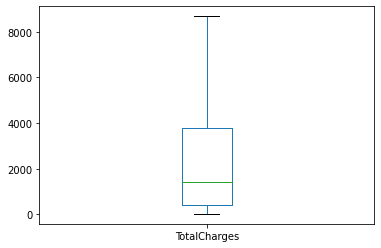

In [6]:
data['TotalCharges'].plot(kind='box');

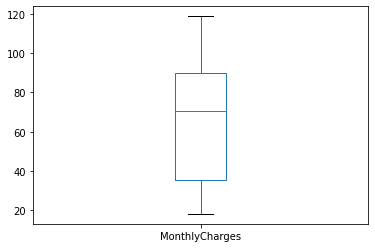

In [7]:
data['MonthlyCharges'].plot(kind='box');

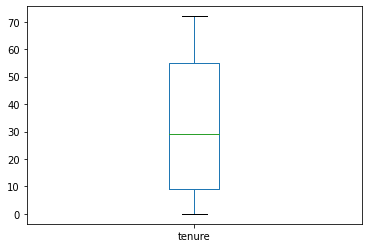

In [8]:
data['tenure'].plot(kind='box');

**There seems to be no outliers in this dataset.**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**All datatypes seems to be correct.**

In [10]:
# finding total missing values from each columns
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Clearly, there is some missing data in `TotalCharges` column.** 
Filling the missing values with median.

In [11]:
# filling TotalCharges by its median value
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

In [12]:
data.isna().sum().any()

False

**No missing value.**

In [13]:
# checking balancing of the dataset
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**Clearly, the given dataset is highly imbalanced.**

There are more active connections compared to the other non-active connections or churned counterparts.

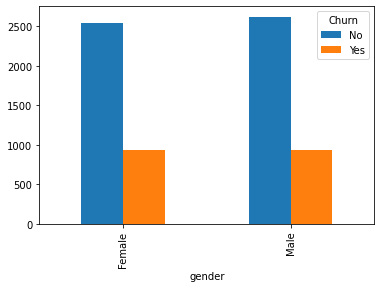

In [14]:
pd.crosstab(data['gender'],data['Churn']).plot(kind='bar');

**Women seems to churn slightly more than men.**

# Encoding categorical data
Here we are going to use two methods.
* For columns consisting of binary values, we are going to use LabelEncoder().
* For columns having more than two values, later on we are going to use pandas's get_dummies(). For now, we do nothing.

In [15]:
# finding discrete values of each column having non numeric data type
for col in data.select_dtypes(include='object').columns:
    print(f'{col} - {data[col].nunique()} - {data[col].unique()}.')

gender - 2 - ['Female' 'Male'].
Partner - 2 - ['Yes' 'No'].
Dependents - 2 - ['No' 'Yes'].
PhoneService - 2 - ['No' 'Yes'].
MultipleLines - 3 - ['No phone service' 'No' 'Yes'].
InternetService - 3 - ['DSL' 'Fiber optic' 'No'].
OnlineSecurity - 3 - ['No' 'Yes' 'No internet service'].
OnlineBackup - 3 - ['Yes' 'No' 'No internet service'].
DeviceProtection - 3 - ['No' 'Yes' 'No internet service'].
TechSupport - 3 - ['No' 'Yes' 'No internet service'].
StreamingTV - 3 - ['No' 'Yes' 'No internet service'].
StreamingMovies - 3 - ['No' 'Yes' 'No internet service'].
Contract - 3 - ['Month-to-month' 'One year' 'Two year'].
PaperlessBilling - 2 - ['Yes' 'No'].
PaymentMethod - 4 - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'].
Churn - 2 - ['No' 'Yes'].


In [16]:
# initialising LabelEncoder instance (l_encoder)
l_encoder = LabelEncoder()

for col in data.select_dtypes(include = 'object').columns:
    if data[col].nunique()==2:
        # applying LabelEncoder()
        data[col] = l_encoder.fit_transform(data[col])

print('LabelEncoding for binary value columns finishes.')

LabelEncoding for binary value columns finishes.


# Checking correlations and multicolinearity between columns
First of all, we will try to find correlation of each numerical datatype column with the target column(`Churn`). After that, we try to plot correlation matrix and try to find out multi-correlated columns using Variance Inflation Factors(VIF).

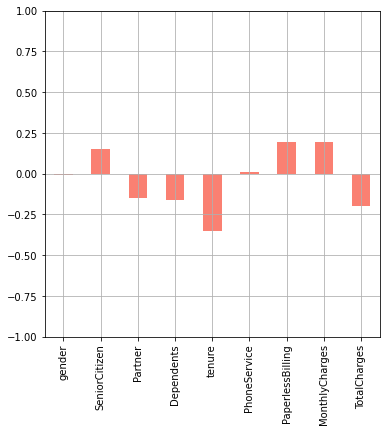

In [17]:
# checking for mulicolinearity between numerical data and Churn column
data2 = data.select_dtypes(exclude = 'object')

corr_churn = data2.corrwith(data2['Churn'])
# to take out Churn column
corr_churn[:-1].plot.bar(figsize=(6,6), color='Salmon', grid=True)
plt.ylim(-1,1)
plt.show()

**Clearly, `gender` and `PhoneService` has very low correlation with the target column.**

Also, there is positive correlation of `SeniorCitizen`, `PaperlessBilling` and `MonthlyCharges` with target column. While, there is negative correlation of `Partner`, `Dependents`, `tenure` and `TotalCharges` with target column.

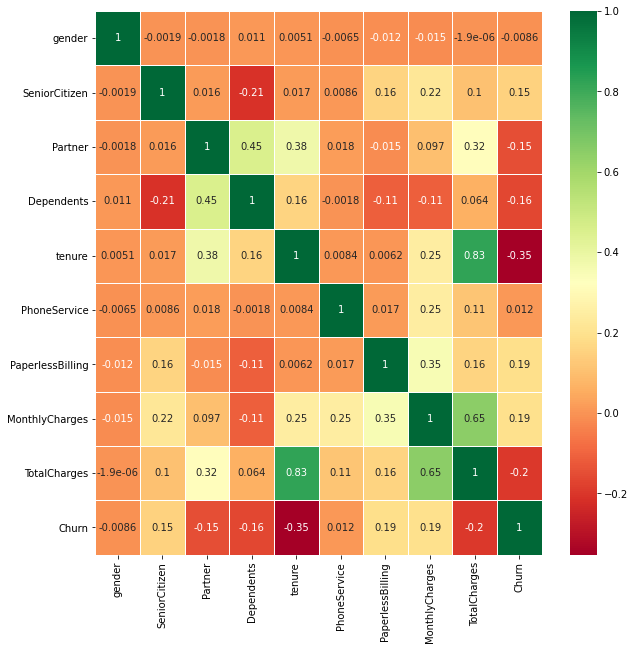

In [18]:
# plotting correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=.5)
plt.show()

`TotalCharges` is highly positively correlated with `tenure` and `MonthlyCharges`.

In [19]:
def calc_VIF(dataset):
    '''
    This function finds out the Multicorrelated columns using Variance Inflation Factors(VIF) and returns back a dataframe consisting of column's name and their VIFs.
    '''
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    
    return vif

In [20]:
VIF = calc_VIF(data.select_dtypes(exclude = 'object'))
VIF

,features,VIF
0,gender,1.922275
1,SeniorCitizen,1.336574
2,Partner,2.815461
3,Dependents,1.924342
4,tenure,10.635517
5,PhoneService,8.000377
6,PaperlessBilling,2.841558
7,MonthlyCharges,15.892306
8,TotalCharges,13.269451
9,Churn,1.791250


**Clearly, `MonthlyCharges`(15.89) and `TotalCharges`(13.27) have high VIF value.**

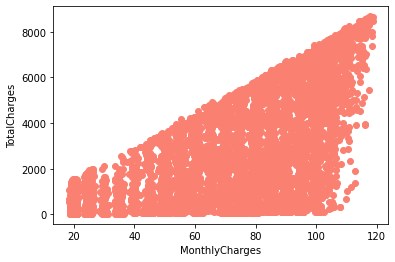

In [21]:
# plotting scatter plot for MonthlyCharges and TotalCharges
plt.scatter(y = 'TotalCharges', x = 'MonthlyCharges', data = data, c = 'Salmon')
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.show()

Let's try to drop one column, namely `TotalCharges`, and again calculate VIFs.

In [22]:
VIF1 = calc_VIF(data.select_dtypes(exclude = 'object').drop(columns = 'TotalCharges'))
VIF1

,features,VIF
0,gender,1.883783
1,SeniorCitizen,1.334386
2,Partner,2.814820
3,Dependents,1.909050
4,tenure,3.771165
5,PhoneService,6.016842
6,PaperlessBilling,2.793307
7,MonthlyCharges,8.060740
8,Churn,1.707811


**After removing `TotalCharges`, the VIFs of all other columns decreases to some extent.**

### Using pd.get_dummies for rest non-binary categorical columns

In [23]:
data = pd.get_dummies(data)

# Dividing dataset into calibration and validation set

In [24]:
calibration_data = data[:4000]
validation_data = data[4000:]

In [25]:
# feature and target from training dataset
y_train = calibration_data['Churn']
X_train = calibration_data.drop(columns='Churn')

# feature and target from testing dataset
y_test = validation_data['Churn']
X_test = validation_data.drop(columns='Churn')

# Scaling training and testing dataset

In [26]:
# initiating scaler instance
scaler = StandardScaler()

train_temp = pd.DataFrame(scaler.fit_transform(X_train))
train_temp.columns = X_train.columns.values
train_temp.index = X_train.index.values

# overwriting on previous training dataset
X_train = train_temp

# transforming test dataset 
test_temp = pd.DataFrame(scaler.transform(X_test))
test_temp.columns = X_test.columns.values
test_temp.index = X_test.index.values

# overwriting on previous testing dataset
X_test = test_temp

# Model Selection on whole dataset

In [27]:
def model_performance(model_arr, X = X_train, y = y_train):
    '''
    This function calculates the performance of each model formulated in model array(model_arr), using k-fold cross-validation . 
    And this function print this dataframe and visualize their respective accuracy and ROC AUC.'''
    
    # list for model results
    model_name = []
    acc_result = []
    roc_result = []
    model_result = pd.DataFrame(columns = ['Name', 'ROC AUC mean', 'ROC AUC std', 'Accuracy mean', 'Accuracy std'])
    
    # for indexing
    i = 0
    
    for name, model in model_arr:
        kfold = KFold(n_splits=10, random_state = 35, shuffle=True)
        
        # Accuracy result
        cv_acc_result = cross_val_score(model, X, y, cv = kfold, scoring = 'accuracy')
        # ROC AUC result
        cv_roc_result = cross_val_score(model, X, y, cv = kfold, scoring = 'roc_auc')
        
        # appending results
        model_name.append(name)
        acc_result.append(cv_acc_result)
        roc_result.append(cv_roc_result)
        model_result.loc[i] = [name,
                                round(cv_roc_result.mean()*100,2),
                                round(cv_roc_result.std()*100,2),
                                round(cv_acc_result.mean()*100,2),
                                round(cv_acc_result.std()*100,2)]
        i+=1
    
    # Sorting model_result into decrasing ROC AUC mean value
    model_result.sort_values(by=['ROC AUC mean'], ascending=False, inplace=True)
    
    
    # printing dataframe
    print(model_result)
    
    # visualization of accuracy results
    fig, ax  = plt.subplots(figsize=(10,6))
    ax = plt.boxplot(acc_result)
    plt.xticks(range(1,len(model_name)+1), model_name)
    plt.title('Accuracy Score Comparison',fontsize = "22")
    plt.show()
    
    # visualization of ROC AUC results
    fig, ax  = plt.subplots(figsize=(10,6))
    ax = plt.boxplot(roc_result)
    plt.xticks(range(1,len(model_name)+1),model_name)
    plt.title('ROC AUC Score Comparison',fontsize = "22")
    plt.show()

In [28]:
baseline_model = []

baseline_model.append(('Logistic Regression', LogisticRegression(random_state = 35)))

baseline_model.append(('SVC', SVC(random_state = 35)))

baseline_model.append(('KNN', KNeighborsClassifier()))

baseline_model.append(('Gaussian NB', GaussianNB()))

baseline_model.append(('Decision Tree', DecisionTreeClassifier(random_state = 35)))

baseline_model.append(('Random Forest', RandomForestClassifier(random_state = 35)))

baseline_model.append(('Linear Discriminant', LinearDiscriminantAnalysis()))

baseline_model.append(('XG Boost', XGBClassifier(use_label_encoder = False, eval_metric='mlogloss', random_state = 35)))

                  Name  ROC AUC mean  ROC AUC std  Accuracy mean  Accuracy std
0  Logistic Regression         85.26         1.73          80.20          1.58
6  Linear Discriminant         84.53         1.84          79.75          1.57
5        Random Forest         83.24         1.73          79.00          1.47
3          Gaussian NB         82.85         2.21          69.60          2.22
7             XG Boost         82.81         1.80          78.48          1.38
1                  SVC         81.06         2.40          79.60          1.29
2                  KNN         78.20         1.72          76.02          1.25
4        Decision Tree         66.25         2.18          73.12          2.01


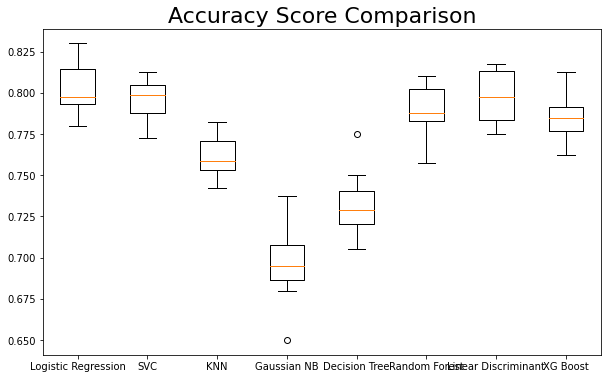

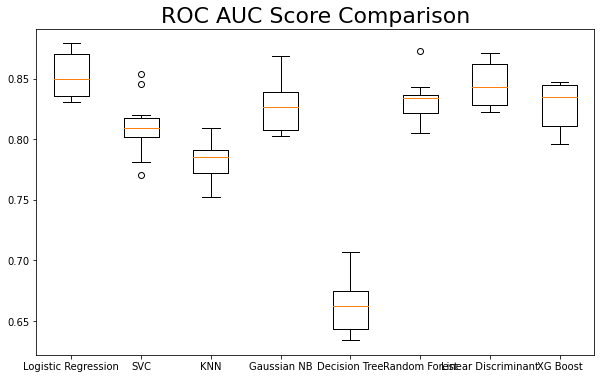

In [29]:
model_performance(baseline_model)

**Clearly, LogisticRegression() achieved a better ROC AUC score than the rest baseline models and the highest accuracy.**

More things can also be done after baseline model performance. Like you can find optimal number of neighbors for KNN model. Or you can search for number of trees for RandomForest model to achieve a greater accuracy than preivous model. But for now, we won't be doing that.

# Scoring models on whole datasets
We are now going to find Score for each baseline model. For that, again we are going to define a function, to calculate Accuracy, Precision, Recall, F1 score.

In [30]:
def model_score(model_arr, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):
    '''
    This function calculates the score of each model formulated in model array(model_arr). These scoring consist of accuracy, precision, recall, f1 score.
    And this function print scoring dataframe.'''
    
    # scoring dataframe 
    model_score = pd.DataFrame(columns = ['Name', 'Accuracy(%)', 'Precision(%)', 'Recall(%)', 'F1 Score(%)'])
    
    # for indexing
    i = 0
    
    for name, model in model_arr:
        # fitting model
        model.fit(X_train,y_train)
        # predicting on testing data
        y_preds = model.predict(X_test)
        
        # scoring of model
        accuracy = accuracy_score(y_test, y_preds)
        precision = precision_score(y_test, y_preds)
        recall = recall_score(y_test, y_preds)
        f1 = f1_score(y_test, y_preds)
        
        # appending into dataframe
        model_score.loc[i] = [name,
                              round(accuracy*100,2),
                              round(precision*100,2),
                              round(recall*100,2),
                              round(f1*100,2)]
        i+=1
        
    model_score.sort_values(by='Accuracy(%)', ascending = False, inplace=True)
    print(model_score)

In [31]:
model_score(baseline_model)

                  Name  Accuracy(%)  Precision(%)  Recall(%)  F1 Score(%)
0  Logistic Regression        80.51         66.32      54.80        60.01
6  Linear Discriminant        79.36         63.11      54.56        58.52
1                  SVC        79.30         65.07      48.40        55.51
7             XG Boost        78.51         62.12      49.88        55.33
5        Random Forest        78.38         62.71      46.80        53.60
2                  KNN        75.58         54.68      49.63        52.03
4        Decision Tree        72.76         48.95      48.77        48.86
3          Gaussian NB        68.42         45.00      82.51        58.24


**Clearly, Losistic Regession has done pretty good than other models.**

# Model Evaluation
From now onwards, we are going to use LogisticRegression model only. In this section, we are trying to evaluate this model.

In [32]:
# initiating new instance
clf = LogisticRegression(random_state = 35)

kfold = KFold(n_splits=10, random_state = 35, shuffle = True)

cv_acc = cross_val_score(clf, X_train, y_train, cv = kfold, scoring = 'accuracy')
cv_pre = cross_val_score(clf, X_train, y_train, cv = kfold, scoring = 'precision')
cv_rec = cross_val_score(clf, X_train, y_train, cv = kfold, scoring = 'recall')
cv_f1 = cross_val_score(clf, X_train, y_train, cv = kfold, scoring = 'f1')
cv_auc = cross_val_score(clf, X_train, y_train, cv = kfold, scoring = 'roc_auc')

eval = pd.DataFrame(index=['Logistic Regression'])
eval['Accuracy'] = round(cv_acc.mean()*100,2)
eval['Precision'] = round(cv_pre.mean()*100,2)
eval['Recall'] = round(cv_rec.mean()*100,2)
eval['Area under curve'] = round(cv_auc.mean()*100,2)

eval

,Accuracy,Precision,Recall,Area under curve
Logistic Regression,80.2,64.93,55.05,85.26


### Evaluating model using confusion matrix

In [33]:
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
cm

array([[2005,  226],
       [ 367,  445]], dtype=int64)

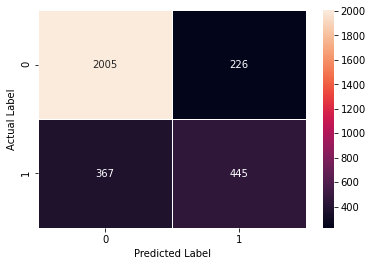

In [34]:
sns.heatmap(cm, annot=True, linewidths=.5, fmt='.0f')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**AS it was very clear from the start that this dataset is imbalanced.** That's why this model is good in prediciting '0' label target than the '1' label target.

### Evaluating model using ROC Graph

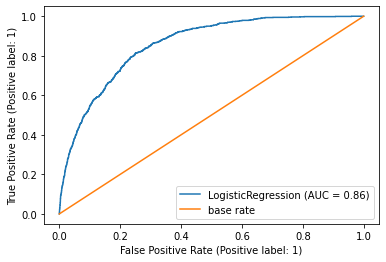

In [35]:
roc_graph = plot_roc_curve(clf, X_train, y_train)
plt.plot([0,1],[0,1], label = 'base rate')
plt.legend()
plt.show()

# Feature Selection

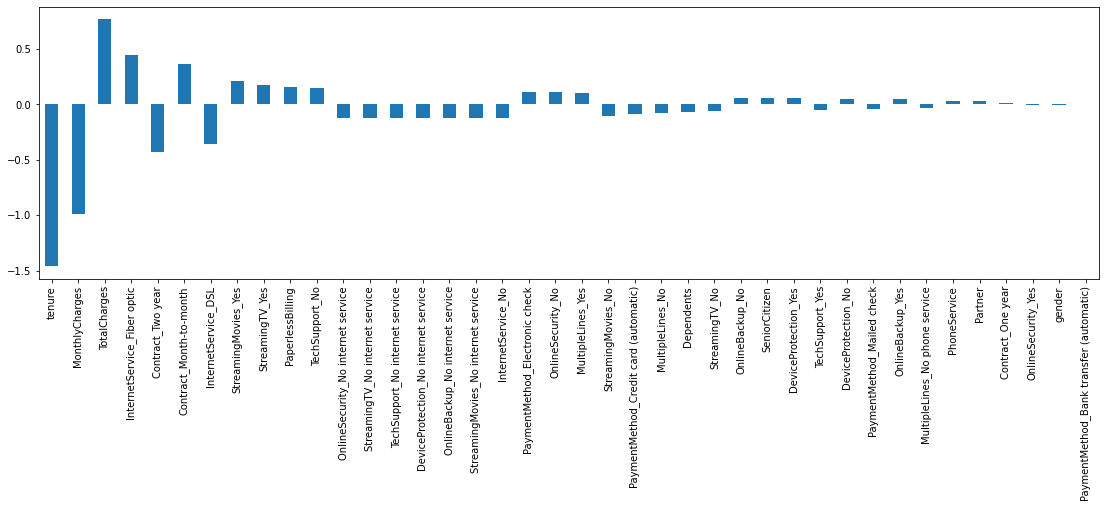

In [36]:
clf = LogisticRegression(random_state = 35)
clf.fit(X_train,y_train)
importance_df = pd.DataFrame(clf.coef_[0], index = X_train.columns, columns = ['Importance'])
importance_df['Absolute Importance'] = np.absolute(importance_df['Importance'])
importance_df.sort_values(by='Absolute Importance', ascending=False, inplace=True)

# plotting column's importance
plt.figure(figsize=(19,5))
importance_df['Importance'].plot(kind='bar')
plt.show()

In [37]:
# selecting top 30 columns having high importance
selected_col = importance_df[:30].index.tolist()

In [38]:
# updating training and testing dataset
X_train = X_train[selected_col]
X_test = X_test[selected_col]

# Hypertuning of LogisticRegression using GridSearchCV() with selected columns

In [39]:
# describing grid
grid = {'penalty' : ['l2'],
        'C' : [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
        'solver' : ['newton-cg', 'lbfgs', 'liblinear']}

# intializing new instance
clf1 = LogisticRegression(random_state = 35)

kfold = KFold(n_splits=10, random_state = 35, shuffle = True)

gs_clf = GridSearchCV(clf1, param_grid = grid, cv= kfold, verbose = True, scoring='accuracy')
gs_clf.fit(X_train, y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=35, shuffle=True),
             estimator=LogisticRegression(random_state=35),
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=True)

In [40]:
print(f' Parameter - {gs_clf.best_params_}    Score - {gs_clf.best_score_}')

 Parameter - {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}    Score - 0.8029999999999999


## Evluating new model with best parameters

In [41]:
# initiating new instance
clf = LogisticRegression(random_state = 35, C = 1, penalty = 'l2', solver = 'liblinear')

clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

eval = pd.DataFrame(index=['Logistic Regression'])
eval['Accuracy'] = round(accuracy_score(y_test, y_preds)*100,2)
eval['Precision'] = round(precision_score(y_test, y_preds)*100,2)
eval['Recall'] = round(recall_score(y_test, y_preds)*100,2)
eval['f1'] = round(f1_score(y_test, y_preds)*100,2)

eval

,Accuracy,Precision,Recall,f1
Logistic Regression,80.38,66.07,54.43,59.69


[[2004  227]
 [ 370  442]]


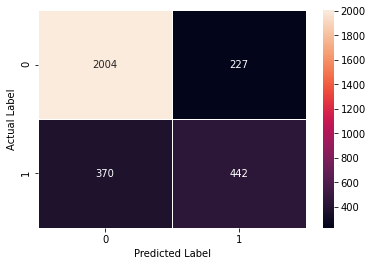

In [42]:
cm = confusion_matrix(y_test, y_preds)
print(cm)
sns.heatmap(cm, annot=True, linewidths=.5, fmt='.0f')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Clearly, after hypertuning the classifier performance slightly decreases.** But we will keep this classifier and move ahead to the prediction.

# Predictions

In [43]:
y_preds_probs = clf.predict_proba(X_test)

result = pd.concat([ID[4000:], y_test], axis=1)
result['Prediction'] = y_preds

result['Churning Probability'] = y_preds_probs[:,1]

result

,customerID,Churn,Prediction,Churning Probability
4000,0420-HLGXF,0,1,0.665584
4001,7446-KQISO,0,0,0.080791
4002,9823-EALYC,0,0,0.005028
4003,0582-AVCLN,0,0,0.005930
4004,5803-NQJZO,0,0,0.004006
...,...,...,...,...
7038,6840-RESVB,0,0,0.101052
7039,2234-XADUH,0,0,0.153307
7040,4801-JZAZL,0,0,0.412816
7041,8361-LTMKD,1,1,0.710907


# Conclusion
In the end, we have formulated/trained a model that will predict using given features, that whether a custpmer will churn or not, with the accuracy of 80.38%.

# Questions

**Ques1.** Data cleaning including missing values, outliers and multi-collinearity?

**Answer:** While doing data cleaning, I found some missing values in `TotalCharges` column. I thought there will be some relation between `MonthlyCharges` and `TotalCharges`, but that was not the case. So I handle these missing values, by filling them with median value, so that there will be less effect on the model, if there is some outliers in the `TotalCharges` column.

After that, I boxplot all the numerical columns of the data to see if there is any outliers in them. But there were none.

To check Multi-collinearity, firstly I encoded binary columns using LabelEncoder(). Then, I try to find the correlation between independent columns and the target column (`Churn`). And after that, i try to plot correlation matrix of all columns. To found out that `TotalCharges` is highly positively correlated with `tenure` and `MonthlyCharges`. After that, i also use VIF to find multi-correlated columns, there i found that `MonthlyCharges` and `TotalCharges` has VIF factor greater than 12.

**Ques2.** Describe your predictive churn model in elaboration.

**Answer:** Customer churn prediction models aim to detect customers with a high propensity to attrite(leave/loss). An accurate model permits to correctly target future churners in a retention marketing campaign, while a comprehensible and intuitive rule-set allows to identify the main drivers for customers to churn, and to develop an effective retention strategy in accordance with domain knowledge.

**Ques3.** How did you select variables to be included in the model?

**Answer:** For selection of variables or feature engieering, various methods can be applicable.
1. We can use all predictors.
2. Or we can drop multi-correlated columns prior to selecting important variables to reduce dimensionality of the model and to simplify it.
3. Or we can forward or backward selection method, to select K best features using various metrics like chi2, mutual_info_classif, f_classif and many more.

In this model, I formulated base models using whole set f predictors. After that choosing Logistic Regression, and using feature importance provided by this model. I selected first 30 features with high importance, or oe can choose 'k' features depending upon his/her choice or demand of the physical conditions/client. Or you can write a loop to find best 'k' to achieve maximum accuracy.

**Ques4.** Demonstrate the performance of the model by using best set of tools.

**Answer:** That can be seen very clearly up in code.

**Ques5.** What are the key factors that predict customer churn.

**Answer:** In this model, 'tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'Contract', 'InternetService', 'StreamingMovies' and many others, helps us to predict customer churning.

To most of the extent, these factors logically makes sense and also plays a major role in predicting customer churning. But there can be a number of more reasons, that can be drawn from customer complaints like area connection problem etc, that are churning away customers.

**Ques6.** Do these factors make sense? If yes, How? If not, How not?

**Answer:** In this model, the dataset used is highly imbalanced and more skewed towards no churning of customer.
Tenure, monthly charges and total charges, these factors clearly determine whether a given customer is gonna leave this company or not. Higher tenure or monthly charges mainly gonna make new customer churn away. Also remaining features are self explanatory. For example in this model, customer having Fiber Optic as their internet service are very less likely to churn away. Customer having two year contract are obviously most likely to stay for the contract period, so less likely to churn away.

**Ques7.** What kind of offers should be avail to customers to encourage them to remain with
company?

**Answer.** We can provide a number of offers or deals, preventing customer to churn away.
1. We can provide less monthly charges to attract customer.
2. According to this model, customer having fiber optic as internet service are more satisfied. So we can start some discount schemes on this service.
3. Price can be reduce on 2+ year subscription.
4. One can also start lottery system to attract customers.